<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW_5_1_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will train polynomial SVC in this homework.

Use the seed 0 everywhere.

1. First, generate the two moon data as follows:

"X, y = make_moons(n_samples=200, noise=0.3, random_state=0)"

Plot the data.

Randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed throughout the experiments.

2. For each combinations of Cs = [1E-3,1E-2,1E-1,1E0,1E1,1E2,1E3] and ds = [2,3,4]
(a) create a pipeline of polynomial features of degree d, standard scaler and linear SVC with the hyperparameter C
(b) call fit(),
(c) call predict() and measure training and validation error
Report the training and validation error for each combination.

3. Which combination has the smallest validation error? (You can manually find the minimum or you can use "i, j = np.unravel_index(np.argmin(val_errors, axis=None), val_errors.shape)" )

4. Repeat 2 with a pipeline of standard scaler and SVC with the polynomial kernel of degree d, coef0=1, and the hyperparameter C.

5. Repeat 3 with a pipeline of standard scaler and SVC .... (same as above)

6. Should the results of 3 and 5 be identical? Or if not, why? Please comment.

In [ ]:
import sklearn
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

Downloading data

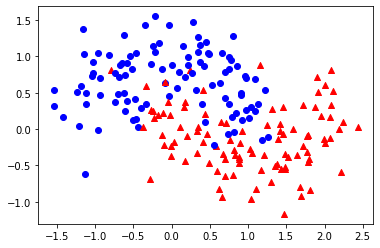

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(X)):
  if y[i] == 1:
    plt.scatter(X[i][0], X[i][1], marker='^', color = "red")
  if y[i] == 0:
    plt.scatter(X[i][0], X[i][1], marker='o', color = "blue")


Plotting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)

X_train1, X_vali, y_train1, y_vali = train_test_split(X_train, y_train, test_size=.25, random_state = 0)

Splitting the data

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
#various imports

for d in [2,3,4]:
  for c in [10**-3,10**-2,10**-1,1,10, 100, 1000]:

    #double for loop to iterate through every d and c variation

    pipeline = Pipeline([
        ('Polynomial Features', PolynomialFeatures(degree=d)),
        ('Scaler', StandardScaler()),
        ('svm', LinearSVC(C=c, random_state=0)) 
    ])

    #creating pipeline

    pipeline.fit(X_train1,y_train1)

    #fitting model

    ypred_train1 = pipeline.predict(X_train1)
    ypred_vali = pipeline.predict(X_vali)
    mse_train1 = mean_squared_error(y_train1, ypred_train1)
    mse_vali = mean_squared_error(y_vali, ypred_vali)

    #using predictions to generate mean squared error for training and validation data

    print("C value:", str(c), "-- D value:", str(d), "-- Training error", str(mse_train1), "-- Validation error", str(mse_vali))

    #printing results


C value: 0.001 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.2
C value: 0.01 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 0.1 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 1 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.15
C value: 10 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.15
C value: 100 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.15
C value: 1000 -- D value: 2 -- Training error 0.39166666666666666 -- Validation error 0.35
C value: 0.001 -- D value: 3 -- Training error 0.175 -- Validation error 0.15
C value: 0.01 -- D value: 3 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 0.1 -- D value: 3 -- Training error 0.16666666666666666 -- Validation error 0.125
C value: 1 -- D value: 3 -- Training error 0.13333333333333333 -- Validation error 0.075
C value: 10 -- D v

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Minimum validation error of .05 for D-val 3 and C-vals 10, 100 AND D-val 4 and C-val 10.

In [ ]:

for d in [2,3,4]:
  for c in [10**-3,10**-2,10**-1,1,10, 100, 1000]:
    pipeline = Pipeline([
        ('Scaler', StandardScaler()),
        ('svm', SVC(kernel = "poly", C=c, coef0=1, degree = d)) 
    ])

    #creating pipeline

    pipeline.fit(X_train1,y_train1)

    #fitting model

    ypred_train1 = pipeline.predict(X_train1)
    ypred_vali = pipeline.predict(X_vali)
    mse_train1 = mean_squared_error(y_train1, ypred_train1)
    mse_vali = mean_squared_error(y_vali, ypred_vali)

    #using predictions to generate mean squared error for training and validation data

    print("C value:", str(c), "-- D value:", str(d), "-- Training error", str(mse_train1), "-- Validation error", str(mse_vali))

    #printing results


C value: 0.001 -- D value: 2 -- Training error 0.48333333333333334 -- Validation error 0.5
C value: 0.01 -- D value: 2 -- Training error 0.175 -- Validation error 0.2
C value: 0.1 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 1 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 10 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 100 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 1000 -- D value: 2 -- Training error 0.16666666666666666 -- Validation error 0.175
C value: 0.001 -- D value: 3 -- Training error 0.45 -- Validation error 0.475
C value: 0.01 -- D value: 3 -- Training error 0.16666666666666666 -- Validation error 0.2
C value: 0.1 -- D value: 3 -- Training error 0.16666666666666666 -- Validation error 0.15
C value: 1 -- D value: 3 -- Training error 0.13333333333333333 -- Validation error 0.075
C value: 10 -- D value: 3 -- Trai

Minimum validation error of .05 for D-val 3 and C-vals 100, 1000 AND D-val 4 and C-val 10.

The results of 3 and 5 should not be identical, however, it makes sense that they are very similar.  The kernel trick uses an estimation of the cross product rather than estimating using polynomial transformation itself.  